In [2]:
import cv2
import numpy as np

### 2.1 영상 파일 읽기 및 화면 표시

In [13]:
imageFile = "C:/Users/User/Downloads/pexels-vlad-alexandru-popa-1402787.jpg"
img = cv2.imread(imageFile)
img2=  cv2.imread(imageFile,0)

encode_img = np.fromfile(imageFile, np.uint8)
img = cv2.imdecode(encode_img,cv2.IMREAD_UNCHANGED)

cv2.imshow('Lena color', img)
cv2.imshow('Lena grayscale',img2)

cv2.waitKey()
cv2.destroyAllWindows()

### 영상 파일 이름에 한글이 있을 때 
#### np.fromfile 함수 이용해서 바이너리 데이터를 넘파이 행렬로 읽은 후, cv2.imdecode 함수로 복호화 해서 opencv에서 사용할 수 있는 형태로 바꿔줌

In [ ]:
imageFile = 'C:/git/opencv-/연습용 한글 경로/car.bmp'

encode_img = np.fromfile(imageFile, np.uint8)
img = cv2.imdecode(encode_img,cv2.IMREAD_UNCHANGED)

cv2.imshow('Lena color', img)
cv2.waitKey()
cv2.destroyAllWindows()

### 2.2 영상 파일 저장

In [31]:
imageFile = "C:/Users/User/Downloads/pexels-vlad-alexandru-popa-1402787.jpg"
img = cv2.imread(imageFile)

encode_img = np.fromfile(imageFile, np.uint8)
img = cv2.imdecode(encode_img,cv2.IMREAD_UNCHANGED)

cv2.imwrite('C:/git/opencv-/exercise/car.bmp', img)
cv2.imwrite("C:/git/opencv-/exercise/car.png", img)
cv2.imwrite("C:/git/opencv-/exercise/car2.png", img, [cv2.IMWRITE_PNG_COMPRESSION, 9]) #img를 압축률 9의 png영상으로 저장. 압축율이 높을 수록 시간이 오래 걸림. 압축률 범위 = [0,9] 디폴트 = 3
cv2.imwrite("C:/git/opencv-/exercise/car2.jpg", img,[cv2.IMWRITE_JPEG_QUALITY, 90]) #img를 90%의 품질을 갖는 jpeg 영상으로 저장. 품질의 범위 = [0,100]. 디폴트 = 95

### 2.3 Matplotlib 1 : 컬러 영상 표시

In [5]:
from matplotlib import pyplot as plt

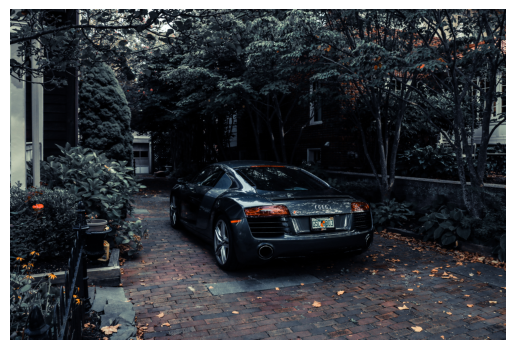

In [7]:
imageFile = "C:/Users/User/Downloads/pexels-vlad-alexandru-popa-1402787.jpg"
imgBGR = cv2.imread(imageFile) #cv2.IMREAD_COLOR
plt.axis('off') #x,y축 표시 안함

imgRGB = cv2.cvtColor(imgBGR,cv2.COLOR_BGR2RGB)
plt.imshow(imgRGB)
plt.show()


### 2.4 Matplotlib 2 :  그레이스케일 영상 표시

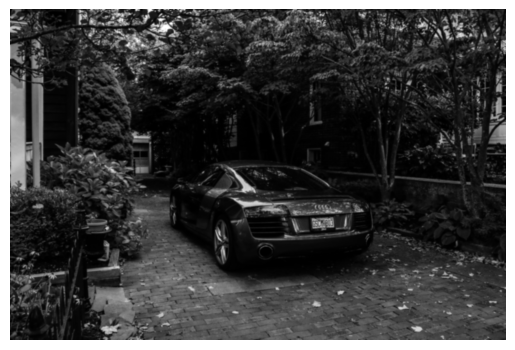

In [10]:
imageFile = "C:/Users/User/Downloads/pexels-vlad-alexandru-popa-1402787.jpg"
imgGray = cv2.imread(imageFile, cv2.IMREAD_GRAYSCALE) #cv2.IMREAD_COLOR

plt.axis('off')

plt.imshow(imgGray, cmap="gray", interpolation= 'bicubic')
plt.show()

### 2.5 Matplotlib 3 :  여백 조정 및 영상저장

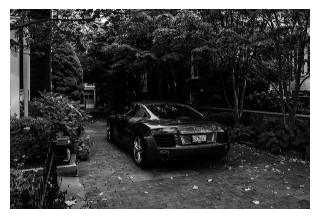

In [17]:
imageFile = "C:/Users/User/Downloads/pexels-vlad-alexandru-popa-1402787.jpg"
imgGray = cv2.imread(imageFile, cv2.IMREAD_GRAYSCALE) 

plt.figure(figsize= (6,6))

plt.subplots_adjust(left = 0, right = 0.5, bottom = 0, top = 0.5)
plt.imshow(imgGray, cmap = 'gray')

plt.axis('off')
#plt.savefig('경로/파일명.파일형식')
plt.show()

### 2.6 Matplotlib 4 : 서브플롯에 영상 표시

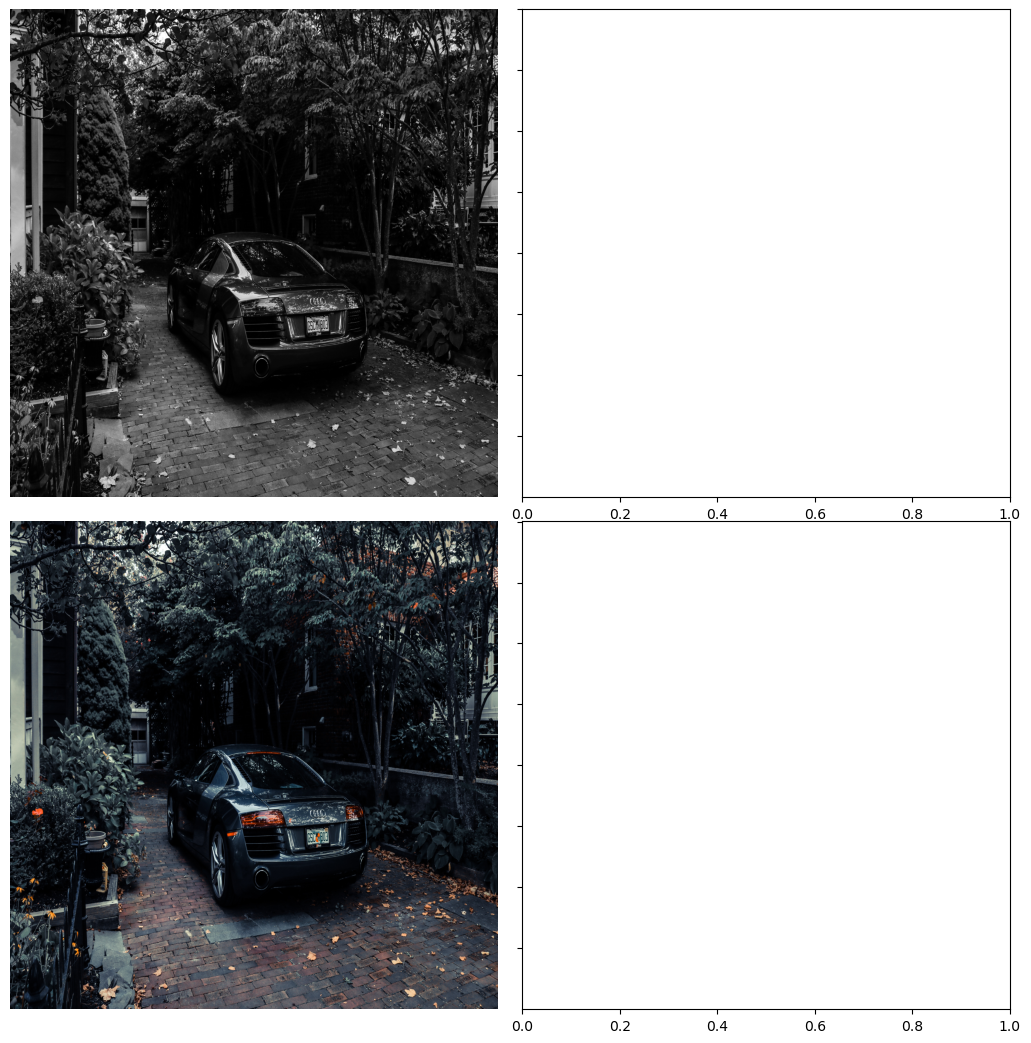

In [28]:
imageFile = "C:/Users/User/Downloads/pexels-vlad-alexandru-popa-1402787.jpg"
imgGray = cv2.imread(imageFile, cv2.IMREAD_GRAYSCALE) #cv2.IMREAD_COLOR
imgBGR = cv2.imread(imageFile) #cv2.IMREAD_COLOR

#컬러 변환
imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(2, 2, figsize = (10,10), sharey = True)
fig.canvas.manager.set_window_title('Sample Pictures') # figure 객체 fig를 이용해 윈도우 타이틀을 변경

ax[0][0].axis('off')
ax[0][0].imshow(imgGray, aspect = 'auto', cmap='gray') #aspect는 가로세로 비율. figsize와 aspect로 설정된 비율로 각각의 fig 비율이 구성됨

ax[1][0].axis('off')
ax[1][0].imshow(imgRGB, aspect = 'auto')

plt.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, wspace= 0.05, hspace = 0.05)

plt.show()

## 02 비디오 프레임 캡처와 화면표시
#### 이 절에서는 비디오 파일 또는 컴퓨터에 연결된 카메라로부터 비디오 프레임을 캡처하고, 윈도우 화면에 표시하는 방법에 대해 설명.
#### 비디오 캡처는 아날로그 비디오를 디지터로 변환하는 과정. 프레임은 비디오에서 캡처한 한장의 영상, 비디오는 이러한 프레임들의 연속 시퀀스

##### cv2.VideoCapture()는 비디오 또는 카메라 번호 devide로부터 VideoCapture 객체를 생성하여 반환. VideoCapture.isOpend()를 사용하면 비디오 객체가 개방되었는지 확인할 수 있음.
##### cv2.VideoCapture.read()는 개방된 VideoCapture 객체로부터 다음 비디오 프레임을 잡아서 grab 디코딩하여 프레임을 반환. grab(프레임 감지)과 retrieve(프레임 획득) 둘을 실행함. 프레임 캡처에 성공하면 retrval = True, 실패하면 False
##### cv2.VideoCapture.release()는 개방된 VideoCapture 객체를 해제하여 닫음.
##### cv2.VideoCapture.get()은 개방된 VideoCapture 객체의 특성을 실수로 반환함. property_id 종류에는 프레임 속도, 총 프레임 쑤, 캡처된 영상 포맷, 비디오 프레임의 가로세로 크기 등이 있음.
##### cv2.VideoCapture.set()은 개방된 VideoCapture 객체의 property_id 특성을 value로 설정. 설정의 성공 여부를 참,거짓으로 반환함.

In [3]:
cap = cv2.VideoCapture("C:/git/bouncing-ball/video/ball video.mp4")
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 320)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT,240)

frame_size = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
print('fram_size=',frame_size)

while True:
    retval, frame = cap.read()

    if not retval:
        break

    cv2.imshow('frame',frame)

    key = cv2.waitKey(25)
    if key == 27:
        break
if cap.isOpened():
    cap.release()
cv2.destroyAllWindows()

fram_size= (1080, 1920)
